<a href="https://colab.research.google.com/github/rajn2199/100-days_of_mL/blob/main/placement_project_logistic_regression_end_to_end_mlmlipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
# steps

#0. preprocess + EDA + Feature Selection
#1. Extract input and output cols
#2. Scaale the values
#3. Train test spilt(Cross Validation)
#4. Train the model
#5. Evaluate the model/model selction
#6. Deploy the model

In [47]:
import matplotlib.pyplot as plt


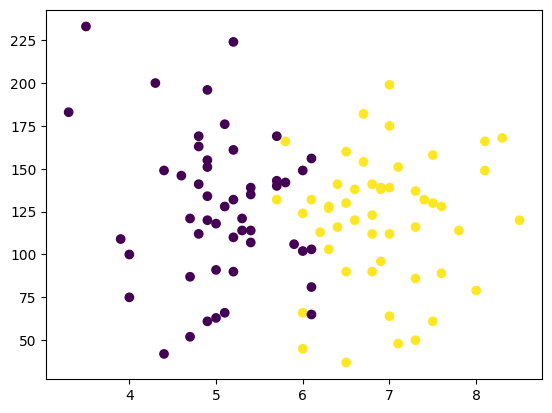

In [48]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [49]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [50]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [53]:
X_train

,Unnamed: 0,cgpa
26,26,7.0
95,95,4.3
97,97,6.7
47,47,5.2
33,33,6.0
...,...,...
53,53,8.3
3,3,7.4
54,54,6.4
58,58,8.0


In [54]:
y_train

,placement
26,1
95,0
97,1
47,0
33,0
...,...
53,1
3,1
54,1
58,1


In [55]:
X_test

,Unnamed: 0,cgpa
11,11,6.9
94,94,4.7
46,46,5.3
4,4,5.8
14,14,6.1
35,35,6.8
92,92,5.2
15,15,5.1
60,60,6.9
88,88,4.4


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
X_train = scaler.fit_transform(X_train)

In [59]:
X_train

array([[-0.84672251,  0.84440718],
       [ 1.59779017, -1.48466143],
       [ 1.66864561,  0.58562178],
       [-0.10274039, -0.70830523],
       [-0.59872847, -0.01821082],
       [-0.77586707, -0.70830523],
       [-0.95300567, -1.13961423],
       [-0.56330075, -1.05335243],
       [ 0.00354277, -2.17475583],
       [-0.17359583, -0.01821082],
       [-0.27987899,  1.36197798],
       [-1.55527691, -0.27699623],
       [ 1.38522385, -0.96709063],
       [-0.03188495, -0.53578163],
       [ 0.99551893,  0.06805098],
       [ 0.03897049, -1.05335243],
       [-1.30728287,  0.32683638],
       [-0.49244531, -0.27699623],
       [-1.51984919, -0.88082883],
       [ 0.07439821,  0.84440718],
       [-1.69698779, -0.62204343],
       [ 1.31436841, -0.27699623],
       [-0.42158987,  0.41309818],
       [ 0.18068137,  1.53450158],
       [ 0.88923577, -1.05335243],
       [ 0.60581401, -0.88082883],
       [-1.09471655, -0.70830523],
       [-0.74043935,  0.84440718],
       [ 0.39324769,

In [60]:
X_test = scaler.transform(X_test)

In [61]:
X_test

array([[-1.37813831,  0.75814538],
       [ 1.56236245, -1.13961423],
       [-0.13816811, -0.62204343],
       [-1.62613235, -0.19073443],
       [-1.27185515,  0.06805098],
       [-0.52787303,  0.67188358],
       [ 1.49150701, -0.70830523],
       [-1.23642743, -0.79456703],
       [ 0.35781997,  0.75814538],
       [ 1.34979613, -1.39839963]])

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:

clf = LogisticRegression()

In [64]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred = clf.predict(X_test)

In [66]:
y_test

,placement
11,1
94,0
46,0
4,0
14,0
35,1
92,0
15,0
60,1
88,0


In [67]:
from sklearn.metrics import accuracy_score

In [68]:

accuracy_score(y_test,y_pred)

1.0

In [69]:

from mlxtend.plotting import plot_decision_regions

<Axes: >

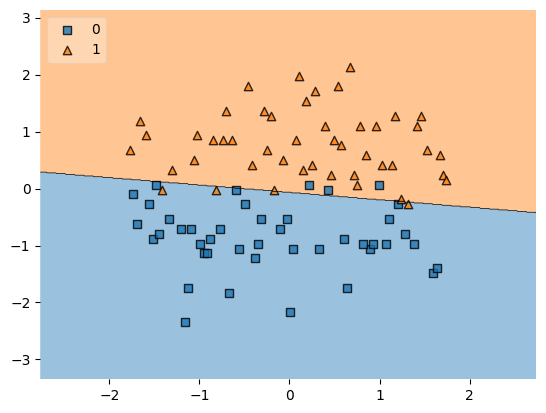

In [70]:

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)